In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from summarytools import dfSummary
from shapely import make_valid
from shapely.geometry import Polygon, MultiPolygon
import seaborn as sns

In [2]:
statscan_reg_data = pd.read_csv(r'statscan_registration_data\20100025.csv')
statscan_reg_data.head()

C:\Users\mwendwa.kiko\AppData\Local\Temp\ipykernel_16000\928463827.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  statscan_reg_data = pd.read_csv(r'statscan_registration_data\20100025.csv')


,REF_DATE,GEO,DGUID,Fuel type,Vehicle type,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,2021A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1671330686,1.4.1.1,425031.0,NaN,NaN,NaN,0
1,2017-01,Canada,2021A000011124,All fuel types,Passenger cars,Number of vehicles,Units,300,units,0,v1671330687,1.4.2.1,130740.0,NaN,NaN,NaN,0
2,2017-01,Canada,2021A000011124,All fuel types,Pickup trucks,Number of vehicles,Units,300,units,0,v1671330688,1.4.3.1,89794.0,NaN,NaN,NaN,0
3,2017-01,Canada,2021A000011124,All fuel types,Multi-purpose vehicles,Number of vehicles,Units,300,units,0,v1671330689,1.4.4.1,176932.0,NaN,NaN,NaN,0
4,2017-01,Canada,2021A000011124,All fuel types,Vans,Number of vehicles,Units,300,units,0,v1671330690,1.4.5.1,27565.0,NaN,NaN,NaN,0


In [ ]:
dfSummary(statscan_reg_data)

c:\Users\mwendwa.kiko\Anaconda3\envs\geopandas_env312\Lib\site-packages\summarytools\summarytools.py:124: RuntimeWarning: divide by zero encountered in scalar divide
  stats += f"<br>IQR (CV) : {x.quantile(0.75) - x.quantile(0.25):.1f} ({x.mean()/x.std():.1f})"
c:\Users\mwendwa.kiko\Anaconda3\envs\geopandas_env312\Lib\site-packages\summarytools\summarytools.py:124: RuntimeWarning: invalid value encountered in scalar divide
  stats += f"<br>IQR (CV) : {x.quantile(0.75) - x.quantile(0.25):.1f} ({x.mean()/x.std():.1f})"
c:\Users\mwendwa.kiko\Anaconda3\envs\geopandas_env312\Lib\site-packages\summarytools\summarytools.py:124: RuntimeWarning: invalid value encountered in scalar divide
  stats += f"<br>IQR (CV) : {x.quantile(0.75) - x.quantile(0.25):.1f} ({x.mean()/x.std():.1f})"


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,REF_DATE[object],1. 2017-012. 2023-073. 2022-014. 2022-045. 2022-076. 2022-107. 2023-018. 2023-049. 2023-1010. 2021-0711. other,"213,800 (2.9%)213,800 (2.9%)213,800 (2.9%)213,800 (2.9%)213,800 (2.9%)213,800 (2.9%)213,800 (2.9%)213,800 (2.9%)213,800 (2.9%)213,800 (2.9%)5,345,000 (71.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA4lJREFUeJzt3EFKI1EARdGfJohOEkLAxbiIXmwvIruRkBq04iQ9sUHRgQP7hp8+ZyJkVJBLhSr+c3U+nwcUflz6Avh/iI2M2MiIjYzYyIiNjNjIiI2M2Misxhh3Y4ybN5+9nM/npwtdD1dsvd/vf242m93fD5ZlOa5Wq1+C47utN5vN7uHh4Wm73T6fTqfbw+Gwe3x8vBljiI1vtR5jjO12+3x/f//79bO7C14PV8wDAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVmPMcbpdLp9+xf+hfWyLMfD4bAbr+fYlmU5jjFeLntZXCMbBDIr/zKLijsbGesqMtZVZKyryHipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvJBxZyNj8ELG4IWMwQsZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41g4GYMXMh4QyPgZJWNdRca6iox1FRkPCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxLJyMdRUZdzYyBi9kDF7IGLyQ8VKXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMo6FkzF4IePORsbghYzBCxmDFzJe6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRsEMhYV5FxZyNjXUXGuoqMdRUZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41g4GYMXMu5sZAxeyBi8kDF4IeOlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2QcCydj8ELGAwIZP6NkrKvIWFeRsa4i4wGBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjHUVGesqMo6Fk7GuIuPORsbghYzBCxmDFzJe6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGsXAyBi9kPruzMY+pfoU+DF6Yx2zjpHeDl0tfDF834zjps8EL85hqnOSlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5l3gxfmMeN39mHwwjxmGyc5Fj63qY6FG7yQ8YBARmxkxEZGbGTERkZsZMRGRmxkxEbmD+AATuJR8OEJAAAAAElFTkSuQmCC"">",0(0.0%)
2,GEO[object],1. Victoria2. Woodstock3. Saint-Isidore4. Shelburne5. Windsor6. Brighton7. Notre-Dame-de-Lourdes8. Armstrong9. Chipman10. Saint-André11. other,"5,600 (0.1%)5,600 (0.1%)5,600 (0.1%)4,200 (0.1%)4,200 (0.1%)4,200 (0.1%)4,200 (0.1%)4,200 (0.1%)4,200 (0.1%)4,200 (0.1%)7,436,800 (99.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA0JJREFUeJzt3MFpG2EURtE3QiT2RkIIVELSg4rINh2riDRhpEXieOMsgkvIHZicU8G/uPAQzKfl/f19oLBb+wH8P8RGRmxkxEZGbGTERkZsZMRGRmxkxEZmtyzL12VZntZ+CNu3m5kvM/N57Yewfc4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZzcyPmfm99kPYvsW/GFFxRsmIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJbPMzPPMfFr7IWze2/58Pn87HA6ntV/Ctj0ej5f94XA4Xa/XX8fj8XXtB7FN9/v96Xa7nfYzM8fj8fVyufxc+1Fs2rMfCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGT2M38/AVn7IWzXR1/L+Xz+7uNJ/rXH4/His3Aqb9ZVZPxAICM2MmIjIzYyYiMjNjJiIyM2MmIj8wdFqVdsnnPGyQAAAABJRU5ErkJggg=="">",0(0.0%)
3,DGUID[object],1. nan2. 2016A000547110263. 2016A000547120384. 2016A000547120125. 2016A000547120046. 2016A000547120017. 2016A000547110918. 2016A000547110499. 2016A0005471104410. 2016A0005471103411. other,"18,200 (0.2%)1,400 (0.0%)1,400 (0.0%)1,400 (0.0%)1,400 (0.0%)1,400 (0.0%)1,400 (0.0%)1,400 (0.0%)1,400 (0.0%)1,400 (0.0%)7,452,200 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPY

: 

Reading and Plotting CSD Shapefile

In [3]:
csd_shp = gpd.read_file(r'CSD_map\lcsd000b21a_e.shp')
csd_shp.head()

,CSDUID,DGUID,CSDNAME,CSDTYPE,LANDAREA,PRUID,geometry
0,1001101,2021A00051001101,"Division No. 1, Subd. V",SNO,870.8928,10,"MULTIPOLYGON (((8991051.954 2038839.069, 89910..."
1,1001105,2021A00051001105,Portugal Cove South,T,1.0770,10,"POLYGON ((9001504.369 2049856.597, 9001184.977..."
2,1001113,2021A00051001113,Trepassey,T,54.2130,10,"POLYGON ((8992311.551 2054468.074, 8994001.626..."
3,1001120,2021A00051001120,St. Shott's,T,1.0729,10,"POLYGON ((8985240.566 2028560.54, 8984967.974 ..."
4,1001124,2021A00051001124,"Division No. 1, Subd. U",SNO,742.3781,10,"MULTIPOLYGON (((8995265.971 2098624.091, 89952..."


In the code below, we use the fact that the [Statscan DGUID definition](https://www12.statcan.gc.ca/census-recensement/2021/ref/dict/az/definition-eng.cfm?ID=geo055) has the first 9 digits as giving coding information, while the following digits give the CSD code, CD code, or whatever. <br>Based on the length of that remaining part, I think the data we have is for CSDs. 

<Axes: >

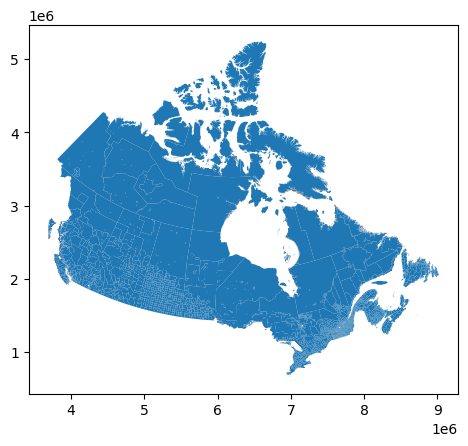

In [4]:
statscan_unique_dguids = statscan_reg_data['DGUID'].unique()
statscan_cd_uids = [str(x)[9:] for x in statscan_unique_dguids if str(x)[:4] == '2016']
csd_shp_filtered = csd_shp[csd_shp['CSDUID'].astype(str).isin(statscan_cd_uids)]
csd_shp_filtered.plot()

In [5]:
csd_shp_filtered.shape, csd_shp.shape

((5020, 7), (5161, 7))

In [6]:
len(set(csd_shp['CSDUID'].astype(str).unique()) - set(statscan_cd_uids))

141

<Axes: >

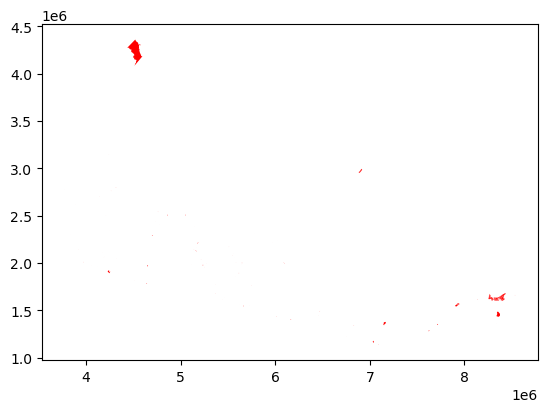

In [8]:
# Plot the dropped areas
dropped_csd = csd_shp[~csd_shp['CSDUID'].astype(str).isin(statscan_cd_uids)]
dropped_csd.plot(color='red')

So it seems that 141 CSDs were dropped, but the spatial coverage is good nonetheless

In [9]:
dropped_csd['CSDUID'].astype(str).unique()

array(['1101003', '1101005', '1101020', '1101025', '1101027', '1101030',
       '1101033', '1101035', '1101037', '1101040', '1101043', '1101045',
       '1101052', '1102002', '1102003', '1102005', '1102010', '1102011',
       '1102013', '1102015', '1102016', '1102017', '1102018', '1102019',
       '1102020', '1102021', '1102022', '1102035', '1102055', '1102061',
       '1102064', '1102066', '1102067', '1102068', '1102069', '1102071',
       '1102072', '1102073', '1103002', '1103003', '1103004', '1103007',
       '1103020', '1103021', '1103022', '1103039', '1103040', '1103043',
       '1103050', '1103053', '1103055', '1103060', '1103061', '1103063',
       '1103064', '1103065', '1103066', '1103067', '1103068', '1204001',
       '1208003', '1215005', '1309010', '1309033', '1313031', '2439152',
       '2460037', '2485052', '2499885', '3549093', '3552037', '3552056',
       '3557092', '3558074', '3558092', '3559046', '3559089', '4607040',
       '4607072', '4609030', '4618061', '4619040', 

In [10]:
# Folium plot of dropped CSDs
import folium

m = folium.Map(location=[56, -96], zoom_start=4)
folium.GeoJson(dropped_csd).add_to(m)
m.save('dropped_csd_map.html')

Looking at dropped_csd_map.html it seems that they're mostly in PEI and other random scattered places across the country. 

Now I'm gonna check how much of the statscan vehicle data isn't CSD level

In [11]:
len(set(statscan_cd_uids) - set(csd_shp_filtered['CSDUID'].astype(str).unique()))

298

There are 313 geographies that aren't CSD's it would seem. 

So it seems that I can use the data for the CSDs that are represented here. What I intend to do is: <ul><li>Filter out data from the statscan vehicle registration dataset that represents CSD level data. <li>Filter out BEVs only. <li>Do a spatial merge between zones and CSDs to find out how to aggregate the CSD-level data <li>Use this to distribute Tesla sales across zones. 

## 1. Filtering CSD Data

In [7]:
statscan_reg_data_filtered = statscan_reg_data[statscan_reg_data['DGUID'].astype(str).str[9:].isin(csd_shp_filtered['CSDUID'].astype(str).unique())]
statscan_reg_data_filtered.shape

(7028000, 17)

In [8]:
statscan_reg_data_filtered_bev = statscan_reg_data_filtered[statscan_reg_data_filtered['Fuel type'] == 'Battery electric']
statscan_reg_data_filtered_bev.shape

(878500, 17)

In [9]:
# Save the filtered data to in distributing tesla transactions
statscan_reg_data_filtered_bev.to_csv('statscan_registration_data_filtered_bev.csv', index=False)

## 2. Spatial Merge

Firstly, reading zonal data

In [14]:
canada_zones = gpd.read_file(r'..\Canada_Combined\Canada_Combined.shp')
canada_zones

,SUM_veh_ad,ZoneID,Province,PRNAME,SUM_total_,geometry
0,143795.0,Alberta_1,Alberta,None,NaN,"POLYGON ((4803949.897 2177793.123, 4803988.163..."
1,142208.0,Alberta_2,Alberta,None,NaN,"POLYGON ((4541006.12 2118359.74, 4542508.151 2..."
2,143793.0,Alberta_3,Alberta,None,NaN,"POLYGON ((4721866.774 1923999.814, 4721366.451..."
3,143526.0,Alberta_4,Alberta,None,NaN,"POLYGON ((4669921.589 1945756.891, 4670597.257..."
4,147897.0,Alberta_5,Alberta,None,NaN,"POLYGON ((4686938.077 1922723.729, 4686960.583..."
...,...,...,...,...,...,...
98,96504.0,Saskatchewan_1,Saskatchewan,None,NaN,"POLYGON ((5209622.386 1911884.694, 5210724.709..."
99,94694.0,Saskatchewan_2,Saskatchewan,None,NaN,"POLYGON ((5292785.966 2012341.174, 5292718.303..."
100,96043.0,Saskatchewan_3,Saskatchewan,None,NaN,"POLYGON ((5308045.791 1685580.294, 5307911.423..."
101,93705.0,Saskatchewan_4,Saskatchewan,None,NaN,"POLYGON ((5203745.634 1844112.56, 5203846 1844..."


In [15]:
canada_zones['ZoneID'] = canada_zones['ZoneID'].str.replace('BritishColumbia', 'BC', regex=False)
canada_zones['ZoneID'] = canada_zones['ZoneID'].str.replace('Quebec', 'QC', regex=False)
canada_zones['ZoneID'] = canada_zones['ZoneID'].str.replace('Ontario', 'ON', regex=False)

I have to filter out Yukon, Nunavut and the NT. But looking at the Bass_Data_Prep folders it's not very clear where exactly that filtering happens. So I'll just open the bass_input csv file and use the list of zones there. 

In [16]:
bass_input = pd.read_csv(r'..\bass_input3.csv')
bass_input.head()

,ZoneID,1900-2005,2006-2010,2011-2015,2017-2020,2021-2024,months_passed_01_2017,months_passed_01_2021
0,Alberta_1,0.0,0.0,0.0,0.0,0.0,-12.033536,-60.069045
1,Alberta_1,0.0,0.0,0.0,0.0,0.0,-11.014302,-59.049811
2,Alberta_1,0.0,0.0,0.0,0.0,0.0,-10.060825,-58.096334
3,Alberta_1,0.0,0.0,0.0,0.0,0.0,-9.041591,-57.077100
4,Alberta_1,0.0,0.0,0.0,0.0,0.0,-8.055236,-56.090745


In [17]:
bass_input['ZoneID'].nunique()

95

In [18]:
set(canada_zones['ZoneID'].astype(str).unique()) - set(bass_input['ZoneID'].astype(str).unique())

{'NewBrunswick_1',
 'NewBrunswick_2',
 'NewBrunswick_3',
 'NewBrunswick_4',
 'NewBrunswick_5',
 'NewLab_1',
 'NewLab_2',
 'PEI_1'}

<Axes: >

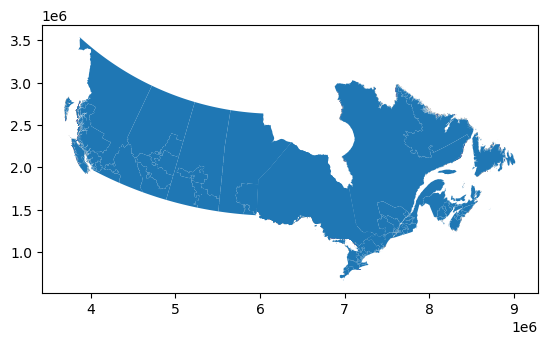

In [19]:
canada_zones.plot()

In a phenomenal plot twist, it seems the real issue is that the maritimes were accidentally dropped from canada_zones before running the regression. This is confirmed by the fact that the regression results .xlsx files don't contain results from the maritime provinces. <br>So **I don't need to filter anything out**.

Now for the spatial merge itself (code from ChatGPT)

In [20]:
import geopandas as gpd
import pandas as pd
import numpy as np



# ---------------------------
# Helper utilities
# ---------------------------

def _ensure_projected_equal_area(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """
    For area proportions, use an equal-area projected CRS.
    If already projected, keep CRS; otherwise project to EPSG:3347 (Canada Lambert).
    """
    if gdf.crs is None:
        raise ValueError("GeoDataFrame has no CRS. Please set .crs before computing areas.")
    if gdf.crs.is_geographic:
        return gdf.to_crs(3347)  # NAD83 / Statistics Canada Lambert
    return gdf

def _clean_geometry(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """Fix invalid geometries and drop empties."""
    gdf = gdf.copy()
    gdf["geometry"] = gdf["geometry"].apply(lambda geom: make_valid(geom) if geom is not None else None)
    gdf = gdf[~gdf.geometry.is_empty & gdf.geometry.notnull()]
    return gdf

def _simplify(gdf: gpd.GeoDataFrame, tol: float | None) -> gpd.GeoDataFrame:
    """Simplify geometries to speed up overlay; preserves topology."""
    if tol is None or tol <= 0:
        return gdf
    gdf = gdf.copy()
    gdf["geometry"] = gdf.geometry.simplify(tol, preserve_topology=True)
    return gdf

# ---------------------------
# Main computation
# ---------------------------

def csd_zone_proportions(
    canada_zones: gpd.GeoDataFrame,
    csd_shp_filtered: gpd.GeoDataFrame,
    *,
    zone_id_col: str = "ZoneID",
    csd_id_col: str = "CDUID",
    simplify_tolerance: float | None = None,  # in CRS units after projection (meters if EPSG:3347)
    use_overlay: bool = True,                 # overlay is simplest; sjoin+intersection is faster for huge data
) -> gpd.GeoDataFrame:
    """
    Returns a GeoDataFrame at (zone, csd) level with:
      - intersection_area
      - csd_area
      - prop_of_csd_in_zone = intersection_area / csd_area
    and geometry = intersection polygon (optional to keep).
    """

    # 1) Copy + basic checks
    zones = canada_zones.copy()
    csds  = csd_shp_filtered.copy()

    if zone_id_col not in zones.columns:
        zones[zone_id_col] = zones.index.astype(str)
    if csd_id_col not in csds.columns:
        csds[csd_id_col] = csds.index.astype(str)

    # 2) Equal-area CRS for correct area proportions
    zones = _ensure_projected_equal_area(zones)
    csds  = _ensure_projected_equal_area(csds)

    # If they differ, align
    if zones.crs != csds.crs:
        csds = csds.to_crs(zones.crs)

    # 3) Clean + optional simplify
    zones = _clean_geometry(zones)
    csds  = _clean_geometry(csds)

    zones = _simplify(zones, simplify_tolerance)
    csds  = _simplify(csds, simplify_tolerance)

    # 4) Compute CSD areas once (denominator for proportions)
    csd_area = csds[[csd_id_col, "geometry"]].copy()
    csd_area["csd_area"] = csd_area.geometry.area

    # 5) Compute intersections (fast path uses vectorized operations; geopandas uses pygeos/shapely speedups if available)
    zones_small = zones[[zone_id_col, "geometry"]].copy()
    csds_small  = csds[[csd_id_col, "geometry"]].copy()

    if use_overlay:
        # overlay does the spatial indexing internally
        inter = gpd.overlay(zones_small, csds_small, how="intersection", keep_geom_type=False)
    else:
        # Alternative: sjoin to get candidate pairs, then intersect (can be faster for very large datasets)
        left = zones_small.reset_index(drop=True)
        right = csds_small.reset_index(drop=True)
        pairs = gpd.sjoin(left, right, how="inner", predicate="intersects")
        # pairs has columns: zone_id_col, csd_id_col, geometry (from zones), index_right
        # Build intersection geometry
        right_geom = right.geometry.take(pairs["index_right"].to_numpy()).reset_index(drop=True)
        inter_geom = pairs.geometry.reset_index(drop=True).intersection(right_geom)
        inter = gpd.GeoDataFrame(
            pairs[[zone_id_col, csd_id_col]].reset_index(drop=True),
            geometry=inter_geom,
            crs=zones.crs
        )
        inter = inter[~inter.geometry.is_empty & inter.geometry.notnull()]

    # 6) Intersection area + proportion
    inter["intersection_area"] = inter.geometry.area

    out = inter.merge(csd_area[[csd_id_col, "csd_area"]], on=csd_id_col, how="left")
    out["prop_of_csd_in_zone"] = np.where(
        out["csd_area"] > 0,
        out["intersection_area"] / out["csd_area"],
        0.0
    )

    # 7) Clean up: keep only positive overlaps
    out = out[(out["intersection_area"] > 0) & out["prop_of_csd_in_zone"].notna()].copy()

    # 8) (Optional) sanity: proportions for each CSD across zones should sum to ~1.0 (small rounding errors ok)
    # sanity = out.groupby(csd_id_col)["prop_of_csd_in_zone"].sum().describe()

    return out

# ---------------------------
# Example usage
# ---------------------------

# Choose a simplify tolerance if you want speed (e.g., 50–200 meters in EPSG:3347).
# Start with None for full accuracy; then raise for speed if acceptable.
result_gdf = csd_zone_proportions(
    canada_zones,
    csd_shp_filtered,
    zone_id_col="ZoneID",      # change if your zones already have an ID column
    csd_id_col="CSDUID",
    simplify_tolerance=100.0,   # set None to disable
    use_overlay=True
)

# result_gdf columns include:
#   ZoneID, CSDUID, geometry (intersection polygon), intersection_area, csd_area, prop_of_csd_in_zone
print(result_gdf.head())


c:\Users\mwendwa.kiko\Anaconda3\envs\geopandas_env312\Lib\site-packages\shapely\set_operations.py:168: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


      ZoneID   CSDUID                                           geometry  \
0  Alberta_1  4811034  MULTIPOLYGON (((4800175.343 2156246.843, 48003...   
1  Alberta_1  4811059  MULTIPOLYGON (((4806057.982 2177781.038, 48059...   
2  Alberta_1  4811061  POLYGON ((4804187.935 2177717.197, 4804647.549...   
3  Alberta_1  4811062  POLYGON ((4806136.577 2177795.037, 4807462.634...   
4  Alberta_1  4811804  MULTIPOLYGON (((4801897.694 2169221.934, 47998...   

   intersection_area      csd_area  prop_of_csd_in_zone  
0       2.630227e+04  2.484641e+09             0.000011  
1       3.915291e+04  2.076273e+09             0.000019  
2       1.231772e+08  7.598551e+08             0.162106  
3       1.503401e+04  4.746719e+07             0.000317  
4       3.007515e+04  5.118141e+07             0.000588  


In [21]:
result_gdf

,ZoneID,CSDUID,geometry,intersection_area,csd_area,prop_of_csd_in_zone
0,Alberta_1,4811034,"MULTIPOLYGON (((4800175.343 2156246.843, 48003...",2.630227e+04,2.484641e+09,1.058594e-05
1,Alberta_1,4811059,"MULTIPOLYGON (((4806057.982 2177781.038, 48059...",3.915291e+04,2.076273e+09,1.885731e-05
2,Alberta_1,4811061,"POLYGON ((4804187.935 2177717.197, 4804647.549...",1.231772e+08,7.598551e+08,1.621062e-01
3,Alberta_1,4811062,"POLYGON ((4806136.577 2177795.037, 4807462.634...",1.503401e+04,4.746719e+07,3.167243e-04
4,Alberta_1,4811804,"MULTIPOLYGON (((4801897.694 2169221.934, 47998...",3.007515e+04,5.118141e+07,5.876187e-04
...,...,...,...,...,...,...
6592,Saskatchewan_5,4812004,"MULTIPOLYGON (((5054235.094 2174694.934, 50581...",1.200103e+06,6.582832e+09,1.823080e-04
6593,Saskatchewan_5,4812038,"POLYGON ((5093755.373 2308508.527, 5093757.569...",1.169775e+04,5.581612e+09,2.095765e-06
6594,Saskatchewan_5,4816037,"MULTIPOLYGON (((5115011.089 2381025.634, 51152...",8.683240e+04,6.326385e+10,1.372544e-06
6595,Saskatchewan_5,6105097,"MULTIPOLYGON (((5291385.243 2755108.076, 52819...",2.256838e+06,1.924892e+11,1.172449e-05


Sanity check: sum of CSD proportions should be 1 for all CSDs

In [22]:
sums = result_gdf.groupby('CSDUID')['prop_of_csd_in_zone'].sum()
sums.describe()

count    4.922000e+03
mean     1.047474e+00
std      2.238188e-01
min      4.371756e-08
25%      9.999694e-01
50%      1.000000e+00
75%      1.000000e+00
max      2.000054e+00
Name: prop_of_csd_in_zone, dtype: float64

In [23]:
sums.loc[(sums > 1.02)|(sums < 0.98)]

CSDUID
1001394    9.703077e-01
1002039    9.720532e-01
1008066    9.725996e-01
1008070    9.745494e-01
1009020    9.779828e-01
               ...     
6104097    1.675620e-05
6105001    3.369662e-03
6105097    3.260466e-05
6204030    3.342491e-07
6205033    4.371756e-08
Name: prop_of_csd_in_zone, Length: 320, dtype: float64

In [24]:
result_gdf.groupby('ZoneID')['prop_of_csd_in_zone'].sum().describe()

count    103.000000
mean      50.055010
std       91.770938
min        0.033869
25%        1.480331
50%        8.944736
75%       52.941260
max      588.890622
Name: prop_of_csd_in_zone, dtype: float64

So the sums don't really add up to 1 when aggregated by CSD, but they definitely don't add up to 1 when aggregated by zone_id. And [ChatGPT's explanation of why](https://chatgpt.com/share/694ae0c0-aeb8-8004-aebb-71131cb94d08) is mostly satisfactory, I think. 

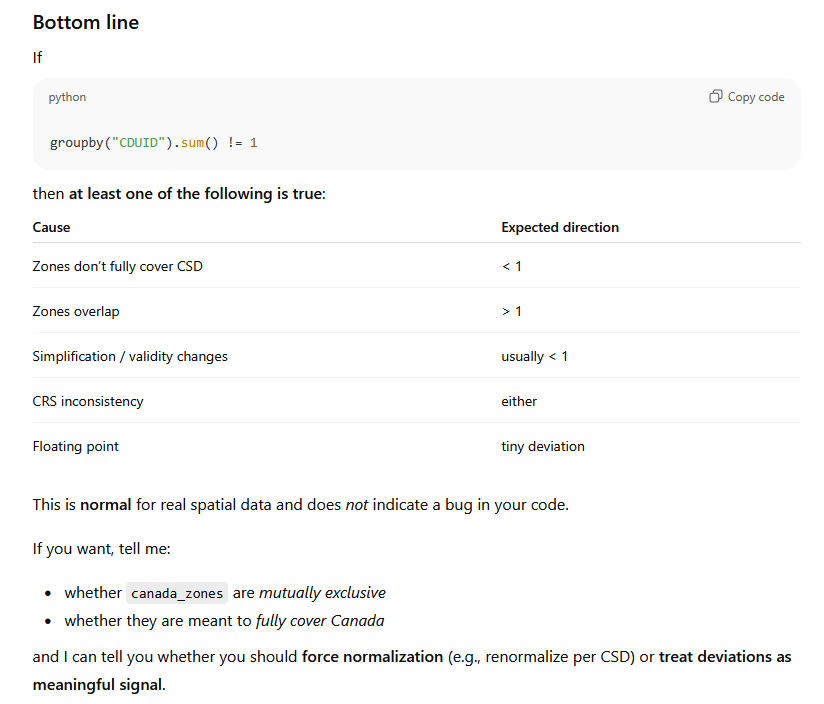

So now, I'll just renormalize by sums to make sure that all the CSDUID totals are 1

In [25]:
result_gdf = result_gdf.merge(sums, left_on='CSDUID', right_index=True, suffixes=('', '_CSDUID_sum'))
result_gdf

,ZoneID,CSDUID,geometry,intersection_area,csd_area,prop_of_csd_in_zone,prop_of_csd_in_zone_CSDUID_sum
0,Alberta_1,4811034,"MULTIPOLYGON (((4800175.343 2156246.843, 48003...",2.630227e+04,2.484641e+09,1.058594e-05,1.000025e+00
1,Alberta_1,4811059,"MULTIPOLYGON (((4806057.982 2177781.038, 48059...",3.915291e+04,2.076273e+09,1.885731e-05,1.000131e+00
2,Alberta_1,4811061,"POLYGON ((4804187.935 2177717.197, 4804647.549...",1.231772e+08,7.598551e+08,1.621062e-01,9.998723e-01
3,Alberta_1,4811062,"POLYGON ((4806136.577 2177795.037, 4807462.634...",1.503401e+04,4.746719e+07,3.167243e-04,1.002760e+00
4,Alberta_1,4811804,"MULTIPOLYGON (((4801897.694 2169221.934, 47998...",3.007515e+04,5.118141e+07,5.876187e-04,1.000000e+00
...,...,...,...,...,...,...,...
6592,Saskatchewan_5,4812004,"MULTIPOLYGON (((5054235.094 2174694.934, 50581...",1.200103e+06,6.582832e+09,1.823080e-04,9.999467e-01
6593,Saskatchewan_5,4812038,"POLYGON ((5093755.373 2308508.527, 5093757.569...",1.169775e+04,5.581612e+09,2.095765e-06,9.997428e-01
6594,Saskatchewan_5,4816037,"MULTIPOLYGON (((5115011.089 2381025.634, 51152...",8.683240e+04,6.326385e+10,1.372544e-06,9.999830e-01
6595,Saskatchewan_5,6105097,"MULTIPOLYGON (((5291385.243 2755108.076, 52819...",2.256838e+06,1.924892e+11,1.172449e-05,3.260466e-05


In [26]:
result_gdf['prop_of_csd_in_zone_normalized'] = result_gdf['prop_of_csd_in_zone'] / result_gdf['prop_of_csd_in_zone_CSDUID_sum']

result_gdf.groupby('CSDUID')['prop_of_csd_in_zone_normalized'].sum().describe()

count    4.922000e+03
mean     1.000000e+00
std      2.482282e-17
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: prop_of_csd_in_zone_normalized, dtype: float64

In [27]:
zone_csd_proportions = result_gdf[['ZoneID', 'CSDUID', 'prop_of_csd_in_zone_normalized']].copy()
zone_csd_proportions.to_csv('zone_csd_proportions_normalized.csv', index=False)